In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os.path
import numpy as np
import json
import os
import bigjson, ijson
import pandas as pd
import tqdm

In [3]:
data_part = [json.loads(x) for x in tqdm.tqdm(open('data/all/ab_804_data.txt', 'r').readlines())]

In [177]:
res = [x for x in data_part if x['symbol'] == 'AB']

In [178]:
res[0]

{'human_receive_time': '2021-08-05 08:14:28.562062716',
 'human_server_time': '2021-08-05 08:14:28.561961111',
 'quotes': [[{'price': -19.9, 'volume': 15},
   {'price': -20, 'volume': 15},
   {'price': -20.1, 'volume': 3},
   {'price': -20.2, 'volume': 15},
   {'price': -20.3, 'volume': 9},
   {'price': -20.4, 'volume': 27},
   {'price': -20.5, 'volume': 15},
   {'price': -20.6, 'volume': 21},
   {'price': -20.7, 'volume': 15},
   {'price': -20.8, 'volume': 27}],
  [{'price': -19.8, 'volume': 30},
   {'price': -19.7, 'volume': 12},
   {'price': -19.6, 'volume': 30},
   {'price': -19.5, 'volume': 3},
   {'price': -19.4, 'volume': 18},
   {'price': -19.0, 'volume': 60},
   {'price': -18.6, 'volume': 3},
   {'price': -18.2, 'volume': 84},
   {'price': -18.1, 'volume': 3},
   {'price': -17.3, 'volume': 6}]],
 'receive_time': 1628151268562062716,
 'server_time': 1628151268561961111,
 'symbol': 'AB',
 'type': 'OrderBook'}

In [140]:
data_part

[{'human_receive_time': '2021-08-05 08:00:00.001529536',
  'human_server_time': '2021-08-05 08:00:00.000738045',
  'receive_time': 1628150400001529536,
  'server_time': 1628150400000738045,
  'symbol': 'A',
  'aggressor_dir': 0,
  'price': 8806,
  'volume': 3,
  'type': 'Deal'},
 {'human_receive_time': '2021-08-05 08:00:00.001529536',
  'human_server_time': '2021-08-05 08:00:00.000738045',
  'receive_time': 1628150400001529536,
  'server_time': 1628150400000738045,
  'symbol': 'A',
  'aggressor_dir': 0,
  'price': 8806,
  'volume': 3,
  'type': 'Deal'},
 {'human_receive_time': '2021-08-05 08:00:00.001529536',
  'human_server_time': '2021-08-05 08:00:00.000738045',
  'receive_time': 1628150400001529536,
  'server_time': 1628150400000738045,
  'symbol': 'A',
  'aggressor_dir': 0,
  'price': 8806,
  'volume': 15,
  'type': 'Deal'},
 {'human_receive_time': '2021-08-05 08:00:00.001529536',
  'human_server_time': '2021-08-05 08:00:00.000738045',
  'receive_time': 1628150400001529536,
  'serv

In [34]:
from enum import Enum


class OBSide(Enum):
    ASK = "ask"
    BID = "bid"


def vwap_for_size(event, size):
    bid = vwap_for_size_impl(event['quotes'][0], size)
    ask = vwap_for_size_impl(event['quotes'][1], size)
    return bid, ask

import numba
@numba.jit
def vwap_for_size_impl(levels, target_size):
    acc_size = 0
    acc_total_price = 0
    for level in levels:
        price, volume = level['price'], level['volume']
        remaining = target_size - acc_size

        if remaining == 0:
            break

        lets_take = min(volume, remaining)
        acc_size += lets_take
        acc_total_price += lets_take * price

    return acc_total_price / acc_size if acc_size == target_size else np.nan

In [35]:
vwap_for_size({'human_receive_time': '2021-08-05 08:00:00.106367730',
               'human_server_time': '2021-08-05 08:00:00.106293381',
               'quotes': [[{'price': 8785.0, 'volume': 9},
                           {'price': 8784.5, 'volume': 9},
                           {'price': 8784, 'volume': 3},
                           {'price': 8783.5, 'volume': 3},
                           {'price': 8783.0, 'volume': 33},
                           {'price': 8782.5, 'volume': 6},
                           {'price': 8782, 'volume': 60},
                           {'price': 8781.5, 'volume': 6},
                           {'price': 8781.0, 'volume': 15},
                           {'price': 8780.5, 'volume': 6}],
                          [{'price': 8787.0, 'volume': 9},
                           {'price': 8787.5, 'volume': 6},
                           {'price': 8788, 'volume': 6},
                           {'price': 8788.5, 'volume': 3},
                           {'price': 8789.0, 'volume': 9},
                           {'price': 8789.5, 'volume': 33},
                           {'price': 8790, 'volume': 21},
                           {'price': 8790.5, 'volume': 6},
                           {'price': 8791.0, 'volume': 57},
                           {'price': 8791.5, 'volume': 126}]],
               'receive_time': 1628150400106367730,
               'server_time': 1628150400106293381,
               'symbol': 'B',
               'type': 'OrderBook'}, 50)

/var/folders/9z/cpwxftc55779b_yfj7khks5j7xkvln/T/ipykernel_84596/3602427426.py:15: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "vwap_for_size_impl" failed type inference due to: non-precise type pyobject
During: typing of argument at /var/folders/9z/cpwxftc55779b_yfj7khks5j7xkvln/T/ipykernel_84596/3602427426.py (17)

File "../../../../../var/folders/9z/cpwxftc55779b_yfj7khks5j7xkvln/T/ipykernel_84596/3602427426.py", line 17:
<source missing, REPL/exec in use?>

  @numba.jit
/Users/ruapiia/Documents/CMF/hft/venv/lib/python3.9/site-packages/numba/core/object_mode_passes.py:151: NumbaWarning: Function "vwap_for_size_impl" was compiled in object mode without forceobj=True.

File "../../../../../var/folders/9z/cpwxftc55779b_yfj7khks5j7xkvln/T/ipykernel_84596/3602427426.py", line 15:
<source missing, REPL/exec in use?>

  warnings.warn(errors.NumbaWarning(warn_msg,
/Users/ruapiia/Documents/CMF/hft/venv/lib/python3.9/site-packages/numba/

(8783.72, 8788.48)

In [36]:
def vwap_for_synthetic(event_x, event_yx, size_y):
    bid = vwap_for_synthetic_impl(event_x['quotes'][0], event_yx['quotes'][0], size_y)
    ask = vwap_for_synthetic_impl(event_x['quotes'][1], event_yx['quotes'][1], size_y)
    return bid, ask


import numba
@numba.jit
def vwap_for_synthetic_impl(levels_x, levels_xy, target_size):
    idx_level_x = 0
    idx_level_xy = 0

    hidden_at_level_x = 0
    hidden_at_level_xy = 0

    acc_size = 0
    acc_total_price = 0
    while target_size > acc_size and idx_level_x < len(levels_x) and idx_level_xy < len(levels_xy):
        price_x = levels_x[idx_level_x]['price']
        price_xy = levels_xy[idx_level_xy]['price']

        remaining = target_size - acc_size
        lets_take = min(levels_x[idx_level_x]['volume'] - hidden_at_level_x,
                        levels_xy[idx_level_xy]['volume'] - hidden_at_level_xy,
                        remaining)

        acc_size += lets_take
        acc_total_price += lets_take * (price_x + price_xy)

        if levels_x[idx_level_x]['volume'] - hidden_at_level_x - lets_take == 0:
            idx_level_x += 1
            hidden_at_level_x = 0
        if levels_xy[idx_level_xy]['volume'] - hidden_at_level_xy - lets_take == 0:
            idx_level_xy += 1
            hidden_at_level_xy = 0

    return acc_total_price / acc_size if acc_size == target_size else np.nan


def vwap_for_synthetic_impl_multiplicative(levels_x, levels_yx, target_size_y):
    # 1. buy y for x
    # 2. buy x, the corresponding amount
    acc_size_y = 0
    target_size_x = 0
    for level in levels_yx:
        price, volume = level['price'], level['volume']
        remaining = target_size_y - acc_size_y

        if remaining == 0:
            break

        lets_take_y = min(volume, remaining)
        acc_size_y += lets_take_y
        target_size_x += lets_take_y * price
    target_size_x = int(np.ceil(target_size_x))

    return vwap_for_size_impl(levels_x, target_size_x)

In [37]:
vwap_for_synthetic({'human_receive_time': '2021-08-05 08:00:00.090844378',
                    'human_server_time': '2021-08-05 08:00:00.090766025',
                    'quotes': [[{'price': 8805.5, 'volume': 114},
                                {'price': 8805.0, 'volume': 141},
                                {'price': 8804.5, 'volume': 144},
                                {'price': 8804, 'volume': 177},
                                {'price': 8803.5, 'volume': 186},
                                {'price': 8803.0, 'volume': 180},
                                {'price': 8802.5, 'volume': 174},
                                {'price': 8802, 'volume': 177},
                                {'price': 8801.5, 'volume': 156},
                                {'price': 8801.0, 'volume': 165}],
                               [{'price': 8806, 'volume': 18},
                                {'price': 8806.5, 'volume': 150},
                                {'price': 8807.0, 'volume': 213},
                                {'price': 8807.5, 'volume': 216},
                                {'price': 8808, 'volume': 315},
                                {'price': 8808.5, 'volume': 159},
                                {'price': 8809.0, 'volume': 183},
                                {'price': 8809.5, 'volume': 144},
                                {'price': 8810, 'volume': 603},
                                {'price': 8810.5, 'volume': 189}]],
                    'receive_time': 1628150400090844378,
                    'server_time': 1628150400090766025,
                    'symbol': 'A',
                    'type': 'OrderBook'},
                   {'human_receive_time': '2021-08-05 08:14:28.562062716',
                    'human_server_time': '2021-08-05 08:14:28.561961111',
                    'quotes': [[{'price': -19.9, 'volume': 15},
                                {'price': -20, 'volume': 15},
                                {'price': -20.1, 'volume': 3},
                                {'price': -20.2, 'volume': 15},
                                {'price': -20.3, 'volume': 9},
                                {'price': -20.4, 'volume': 27},
                                {'price': -20.5, 'volume': 15},
                                {'price': -20.6, 'volume': 21},
                                {'price': -20.7, 'volume': 15},
                                {'price': -20.8, 'volume': 27}],
                               [{'price': -19.8, 'volume': 30},
                                {'price': -19.7, 'volume': 12},
                                {'price': -19.6, 'volume': 30},
                                {'price': -19.5, 'volume': 3},
                                {'price': -19.4, 'volume': 18},
                                {'price': -19.0, 'volume': 60},
                                {'price': -18.6, 'volume': 3},
                                {'price': -18.2, 'volume': 84},
                                {'price': -18.1, 'volume': 3},
                                {'price': -17.3, 'volume': 6}]],
                    'receive_time': 1628151268562062716,
                    'server_time': 1628151268561961111,
                    'symbol': 'AB',
                    'type': 'OrderBook'},
                   50)

/var/folders/9z/cpwxftc55779b_yfj7khks5j7xkvln/T/ipykernel_84596/2031001883.py:8: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "vwap_for_synthetic_impl" failed type inference due to: non-precise type pyobject
During: typing of argument at /var/folders/9z/cpwxftc55779b_yfj7khks5j7xkvln/T/ipykernel_84596/2031001883.py (10)

File "../../../../../var/folders/9z/cpwxftc55779b_yfj7khks5j7xkvln/T/ipykernel_84596/2031001883.py", line 10:
<source missing, REPL/exec in use?>

  @numba.jit
/Users/ruapiia/Documents/CMF/hft/venv/lib/python3.9/site-packages/numba/core/object_mode_passes.py:151: NumbaWarning: Function "vwap_for_synthetic_impl" was compiled in object mode without forceobj=True.

File "../../../../../var/folders/9z/cpwxftc55779b_yfj7khks5j7xkvln/T/ipykernel_84596/2031001883.py", line 8:
<source missing, REPL/exec in use?>

  warnings.warn(errors.NumbaWarning(warn_msg,
/Users/ruapiia/Documents/CMF/hft/venv/lib/python3.9/site-package

(8785.452000000001, 8786.524)

In [38]:
import tqdm

# @numba.jit
def generate_vwaps_B(dataset, size):
    last_event_A = None
    last_event_B = None
    last_event_AB = None

    vwaps_B = []
    vwaps_B_synthetic = []

    for event in tqdm.tqdm(dataset):
        if event['type'] != 'OrderBook':
            continue
        instrument = event['symbol']
        if instrument == 'A':
            last_event_A = event
        elif instrument == 'B':
            last_event_B = event
        elif instrument == 'AB':
            last_event_AB = event

        try:
            if instrument == 'B' and last_event_B is not None:
                bid, ask = vwap_for_size(event, size)
                vwaps_B.append((event['receive_time'], event['server_time'], bid, ask))
            elif (instrument == 'A' or instrument == 'AB') and last_event_A is not None and last_event_AB is not None:
                bid, ask = vwap_for_synthetic(last_event_A, last_event_AB, size)
                vwaps_B_synthetic.append((event['receive_time'], event['server_time'], bid, ask))
        except Exception as e:
            print(event, e)

    return vwaps_B, vwaps_B_synthetic

vwaps_B, vwaps_B_synthetic = generate_vwaps_B(data_part, 50)

100%|██████████| 1938920/1938920 [02:06<00:00, 15352.69it/s]


In [39]:
df_vwaps_B = pd.DataFrame(vwaps_B, columns=['receive_time', 'server_time', 'bid', 'ask'])

In [40]:
df_vwaps_B_synthetic = pd.DataFrame(vwaps_B_synthetic, columns=['receive_time', 'server_time', 'bid', 'ask'])

In [13]:
import matplotlib.pyplot as plt

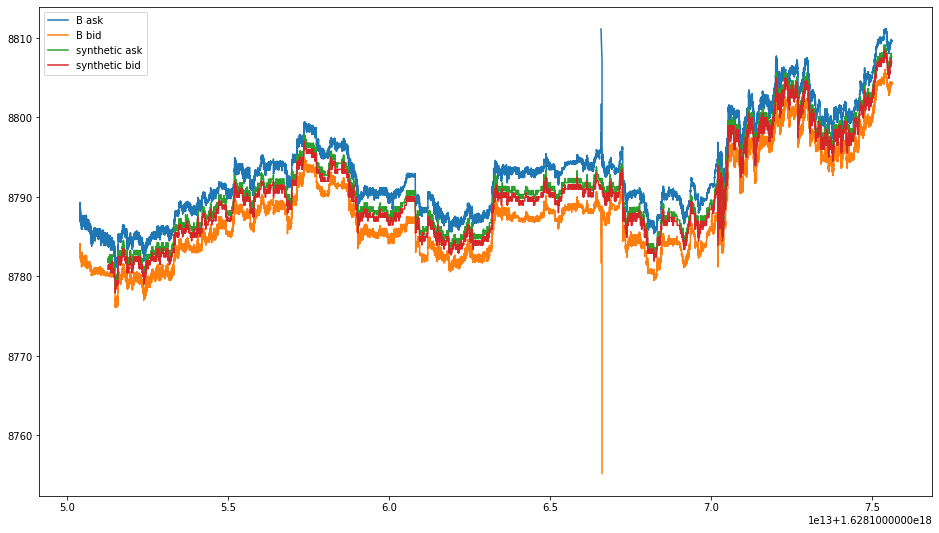

In [41]:
fig, ax = plt.subplots(figsize=(16, 9))

ax.plot('receive_time', 'ask', data=df_vwaps_B, label='B ask')
ax.plot('receive_time', 'bid', data=df_vwaps_B, label='B bid')

ax.plot('receive_time', 'ask', data=df_vwaps_B_synthetic, label='synthetic ask')
ax.plot('receive_time', 'bid', data=df_vwaps_B_synthetic, label='synthetic bid')

ax.legend()